# HW3


## Ozone Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fileName = "LA_AQS_2023.csv" #assign shortcut name to AQS data file

In [3]:
df = pd.read_csv(fileName) #load AQS data into pandas dataframe

In [4]:
df_O3 = df[(df['Parameter Name']=='Ozone') & (df['Duration Description']=='1 HOUR')]
df_O3.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
20,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
64,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
204,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
228,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
271,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [5]:
df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"]) #Convert date column to DateTime

date = df_O3["Date (Local)"]
value = df_O3["Arithmetic Mean"]

C:\Users\alexc\AppData\Local\Temp\ipykernel_14524\1018307524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"]) #Convert date column to DateTime


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, '[$O_{3}$] (ppm)'),
 Text(0.5, 1.0, 'Average Daily Ozone Concentrations, Los Angeles-North Main Street, 2023')]

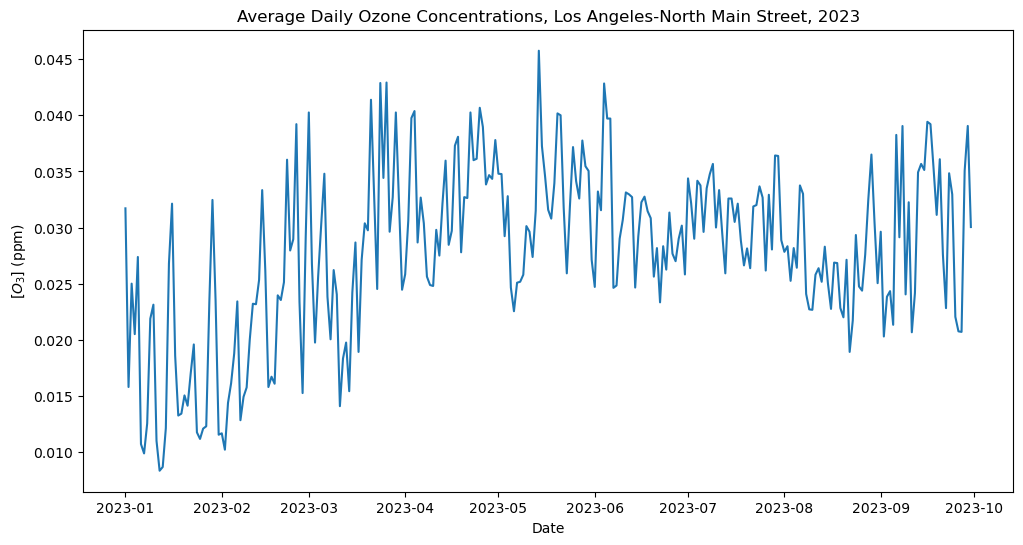

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
fig1 = sns.lineplot(data=df_O3, x=date, y=value)
fig1.set(xlabel='Date', ylabel='[$O_{3}$] (ppm)', title='Average Daily Ozone Concentrations, Los Angeles-North Main Street, 2023')

In [7]:
df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])
df_max = df_O3.set_index('Date (Local)')
df_max = df_max.loc[df_max.groupby(pd.Grouper(freq='Y'))['Arithmetic Mean'].idxmax()]
print (df_max["Arithmetic Mean"])

Date (Local)
2023-05-14    0.04575
Name: Arithmetic Mean, dtype: float64


C:\Users\alexc\AppData\Local\Temp\ipykernel_14524\3760222921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])


In [14]:
df_oz = df[(df['Parameter Name']=='Ozone') & (df['Duration Description']=='1 HOUR')]
rslt_df = df_oz.loc[df_oz['Arithmetic Mean'] > 0.035]

print(len(rslt_df),'days had O3 concentrations above 35 ppbv')

43 days had O3 concentrations above 35 ppbv
